<a href="https://colab.research.google.com/github/mryeazel-729/MLHealth/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [24]:
!pip install hawkeslib

from google.colab import drive
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hawkeslib as hk

# Load & Organize Data

In [25]:
# Mount Google Drive
drive.mount('/content/drive')

# Define file paths for features and timelines CSV files
features_path = '/content/drive/My Drive/Colab Notebooks/features.csv'
timelines_path = '/content/drive/My Drive/Colab Notebooks/timelines.csv'

# Load data into Pandas
features = pd.read_csv(features_path,sep=';')
timelines = pd.read_csv(timelines_path,sep=';')

# Check for missing values in features
print("Missing Values in Features:\n", features.isnull().sum())
print(features)

# Separate continuous and binary features
continuous_data = features[['F1']]
binary_data = features[['F0', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']]

# Scale continuous data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_continuous = scaler.fit_transform(continuous_data)

# Combine scaled continuous and binary data
scaled_data = pd.concat([pd.DataFrame(scaled_continuous, columns=['F1']), binary_data], axis=1)

print(scaled_data)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Missing Values in Features:
 ID    0
F0    0
F1    0
F2    0
F3    0
F4    0
F5    0
F6    0
F7    0
dtype: int64
                  ID  F0        F1  F2  F3  F4  F5  F6  F7
0     GIMO0741213000   0  0.260539   1   0   0   0   0   0
1     MAMA1770428016   1  0.343443   0   1   0   0   0   0
2        NHC14160717   1  0.740823   0   1   0   0   0   0
3     ARAR1670527002   1  0.459585   0   0   1   1   0   0
4           14665507   1  0.437052   0   0   1   0   0   0
...              ...  ..       ...  ..  ..  ..  ..  ..  ..
1107  BETA1850704002   1  0.319240   0   0   1   0   1   1
1108        14031598   1  0.477108   0   1   0   0   0   1
1109  LUCA1741008007   1  0.432726   0   1   0   0   1   1
1110  PALO1760413000   1  0.418051   0   1   0   0   0   1
1111  BAGA1680603002   1  0.496766   0   1   0   0   0   1

[1112 rows x 9 columns]
            F1  F0  F2  

# K-means Clustering

In [26]:
# Calculate absolute times in timelines
# Remove 'Cluster' column if it's still in the df
if 'Cluster' in timelines.columns:
    timelines.drop(columns=['Cluster'], inplace=True)

#Convert columns to numeric
for col in timelines.columns[1:]:
    timelines[col] = pd.to_numeric(timelines[col], errors='coerce')

# Calculate absolute timelines by taking the cumulative sum of the relative times
# Exclude the 'ID' column from the cumulative sum calculation
time_cols = timelines.columns.drop('ID')

# Create a copy of the original DataFrame
absolute_timelines = timelines.copy()

# Print the first rows of the new DataFrame
print("Original Timelines (Relative):")
print(timelines.head())

print("\nAbsolute Timelines:")
print(absolute_timelines.head())

Original Timelines (Relative):
               ID     time_1    time_2    time_3    time_4    time_5  \
0  GIMO0741213000  14.113621  1.300479  0.000000  0.000000  0.000000   
1  MAMA1770428016   8.813142  0.002738  0.884326  0.087611  0.169747   
2     NHC14160717   7.745380  0.000000  0.000000  0.000000  0.000000   
3  ARAR1670527002   7.477070  0.000000  0.000000  0.000000  0.000000   
4        14665507   6.965092  0.000000  0.000000  0.000000  0.000000   

     time_6    time_7    time_8    time_9   time_10   time_11  
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.019165  0.024641  0.804928  0.032854  0.156057  0.073923  
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

Absolute Timelines:
               ID     time_1    time_2    time_3    time_4    time_5  \
0  GIMO0741213000  14.113621  1.300479  0.000000  0.000000 

In [27]:
inertia = []
silhouette = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=11).fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette={score}")

# Find the optimal k based on the maximum silhouette score
optimal_k_index = silhouette_scores.index(max(silhouette_scores))
optimal_k = optimal_k_index + 2  # Add 2 because range started from 2
print(f"Optimal k: {optimal_k}")

k=2, silhouette=0.6157275213855989
k=3, silhouette=0.37535892472065197
k=4, silhouette=0.2427632584687074
k=5, silhouette=0.2652278586012219
k=6, silhouette=0.3018568696459143
k=7, silhouette=0.30235032380675847
k=8, silhouette=0.2874307132623803
k=9, silhouette=0.29288838419175717
k=10, silhouette=0.29416132435563874
Optimal k: 2


In [28]:
# Convert relevant fields to numeric
f_cols = ['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']
t_cols = [f'time_{i}' for i in range(1, 12)]
features[f_cols] = features[f_cols].apply(pd.to_numeric)
timelines[t_cols] = timelines[t_cols].apply(pd.to_numeric)

# Merge for cluster assignment
full = features.merge(timelines, on='ID')

# Cluster patients by features
scaler = StandardScaler()
X = scaler.fit_transform(features[f_cols])
n_clusters = 2  # Optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)
features['cluster'] = clusters
full['cluster'] = clusters

# Prepare Hawkes traces per cluster
cluster_event_traces = []
for cl in range(n_clusters):
    group = full[full['cluster'] == cl]
    patient_traces = []
    for _, row in group.iterrows():
        times = [row[f'time_{i}'] for i in range(1, 12)]
        times = [t for t in times if t > 0]
        if times:
            trace = [sum(times[:i+1]) for i in range(len(times))]
            trace.append(trace[-1] + 1)  # Censor at last event +1 month
            patient_traces.append(trace)
    cluster_event_traces.append(patient_traces)

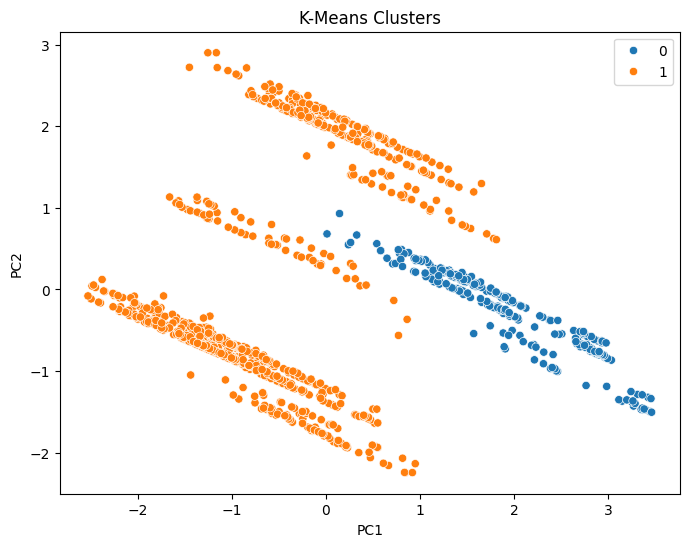

cluster
1    855
0    257
Name: count, dtype: int64


In [29]:
# Visualize clusters with PCA
pca = PCA(n_components=2)

# Scale the features before applying PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[f_cols])

# Apply PCA to the scaled features
pca_result = pca.fit_transform(scaled_features)

# Create a new DataFrame for plotting that includes the PCA results and the cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = features['cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette="tab10")
plt.title('K-Means Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Check clustering distribution
print(features['cluster'].value_counts())

# Hawkes Process

In [30]:
# Create a list of cluster dfs which contain timelines of each cluster
cluster_dfs = []

# Merge absolute_timelines with features to get cluster assignments
absolute_timelines_with_clusters = absolute_timelines.merge(features[['ID', 'cluster']], on='ID', how='left')

# Filter the DataFrame based on the cluster assignment
for cluster_id in range(optimal_k):
    cluster_df = absolute_timelines_with_clusters[absolute_timelines_with_clusters['cluster'] == cluster_id].copy()
    cluster_df.drop(columns=['cluster'], inplace=True)
    cluster_dfs.append(cluster_df)  # Add the DataFrame to the list

for df in cluster_dfs:
    print(df.head())

                ID     time_1    time_2  time_3  time_4  time_5  time_6  \
0   GIMO0741213000  14.113621  1.300479     0.0     0.0     0.0     0.0   
6      NHC14283633   6.453114  0.000000     0.0     0.0     0.0     0.0   
9         14288946   5.659138  0.019165     0.0     0.0     0.0     0.0   
15  JINI1981005000   4.646133  0.000000     0.0     0.0     0.0     0.0   
17  GARO0680415000   4.498289  0.000000     0.0     0.0     0.0     0.0   

    time_7  time_8  time_9  time_10  time_11  
0      0.0     0.0     0.0      0.0      0.0  
6      0.0     0.0     0.0      0.0      0.0  
9      0.0     0.0     0.0      0.0      0.0  
15     0.0     0.0     0.0      0.0      0.0  
17     0.0     0.0     0.0      0.0      0.0  
               ID    time_1    time_2    time_3    time_4    time_5    time_6  \
1  MAMA1770428016  8.813142  0.002738  0.884326  0.087611  0.169747  0.019165   
2     NHC14160717  7.745380  0.000000  0.000000  0.000000  0.000000  0.000000   
3  ARAR1670527002  7.477

In [31]:
# Set t-values to calculate the intensity of the Hawkes Process at different points in time
T_max = 20 # Set the max time
t_values = np.linspace(0, T_max, 1000)

# Set up the Hawkes Process for each cluster, return its parameters and its intensity function at different points in time
def createHawkesData(cluster_df, t_values):

  # In case the 'ID' attribute is still part of the df, remove it
  if 'ID' in cluster_df.columns:
    cluster_df.drop(columns='ID', inplace=True)

  vals = []

  # Iterate over df
  for i in range(cluster_df.shape[0]):

    # Create a list of all values that are in df
    vals.append(cluster_df.iloc[i].values[cluster_df.iloc[i] > 0])

  # Concatenate the values and sort them
  all_times = np.concatenate(vals)
  all_times = np.sort(all_times)

  # Determine total length of timeline data
  print(len(all_times))

  # Initialize and fit Hawkes Process
  uv = hk.UnivariateExpHawkesProcess()
  uv.fit(all_times)

  # Print hawkes parameters
  mu, alpha, beta = uv.get_params()
  print(f"Estimated Paramaters: mu =  {mu} , alpha =  {alpha},  beta =  {beta}")

  # Calculate intensity values
  intensity_values = [mu + np.sum(alpha * beta * np.exp(-beta * (x - all_times[all_times < x]))) \
          for x in t_values]

  return mu, alpha, beta, all_times, intensity_values

In [32]:
# Create a dictionary which contains all the data needed for each Hawkes Process
hawkes_parameters = {}

# Call the Hawkes Process function for every cluster
for i in range(len(cluster_dfs)):
  # Obtain the data
  mu, alpha, beta, times, intensity_values = createHawkesData(cluster_dfs[i], t_values)
  # Fill the dictionary
  hawkes_parameters[f"Cluster {i}"] = {"baseline": (mu, alpha, beta), "adjacency": times, "intensity_vals": intensity_values}

245
Estimated Paramaters: mu =  1.220616722198419 , alpha =  0.9334945837352271,  beta =  10.08832783363873
681
Estimated Paramaters: mu =  4.549239656848978 , alpha =  0.9247828493471174,  beta =  21.872866733948495


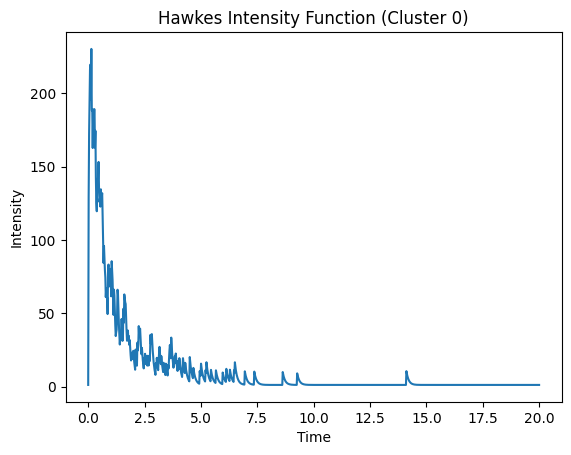

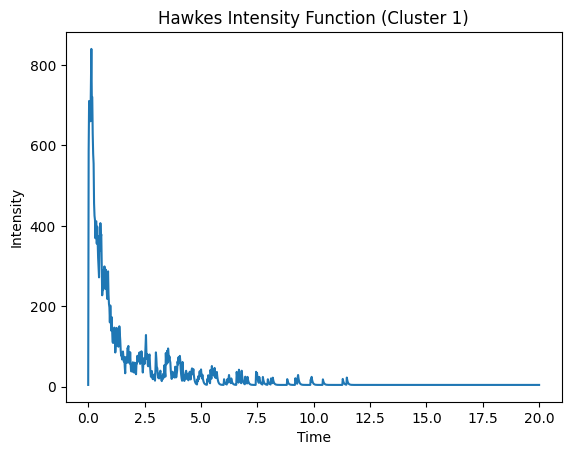

In [33]:
def plot_hawkes_intensity(intensity_values, cluster_id):
    """
    Plots the Hawkes intensity function for a given cluster.
    """

    # Plot the intensity function
    plt.plot(t_values, intensity_values)
    plt.title(f"Hawkes Intensity Function (Cluster {cluster_id})")
    plt.xlabel("Time")
    plt.ylabel("Intensity")
    plt.show()

# Iterate over all clusters and plot the intensity function
for cluster_id in range(len(hawkes_parameters.keys())):
    plot_hawkes_intensity(hawkes_parameters[f'Cluster {cluster_id}']['intensity_vals'], cluster_id)